In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.utils import resample
pd.set_option('display.max.rows' , 10)

In [ ]:
df = pd.read_csv(r"D:\Data Analysis_Bootcamp\Data Mining Project\data_science_job.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
5,2020,Machine Learning Engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Data Science,JPY,178404,105324,DE,EX,PT,Remote,DE,L
7,2021,Data Scientist (Remote),ML/AI,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,NaN,NaN,-44388,171043,UK,NaN,FL,In-person,DE,NaN
9,2022,Statistician (Remote),Engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S


In [ ]:
# Chicking Data Types Of The Columns
print(df.dtypes)

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [3]:
df.describe()

NameError: name 'df' is not defined

In [ ]:
# Removing Duplicate values

df.drop_duplicates()
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [ ]:
# Chicking If There Is Any Missing Values

missing_values = df.isnull().sum()
print(missing_values)

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [ ]:
# Getting The Most Frequent Data To Replace Missing Values With it

print(df['job_category'].mode()[0])
print(df['salary_currency'].mode()[0])
print(df['experience_level'].mode()[0])
print(df['company_size'].mode()[0])

Data Science
EUR
SE
S


In [ ]:
# Chickung the data if balance or imbalance

class_count = df['job_category'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['salary_currency'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['experience_level'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['company_size'].value_counts()
print(class_count)
print('-------------------------------------')


job_category
Data Science    1173
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64
-------------------------------------
salary_currency
EUR          962
INR          916
JPY          891
us dolars    875
GBP          856
Name: count, dtype: int64
-------------------------------------
experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64
-------------------------------------
company_size
S    1519
M    1517
L    1464
Name: count, dtype: int64
-------------------------------------


In [ ]:
# Assigning "Unnown" to "salary_currency" column

df['salary_currency'] = df['salary_currency'].fillna('Unnown')
df['salary_currency']

0             EUR
1             JPY
2             INR
3             JPY
4             EUR
5             JPY
6             JPY
7             JPY
8          Unnown
9       us dolars
10      us dolars
11            INR
12         Unnown
13      us dolars
14            JPY
15            JPY
16            JPY
17            JPY
18            GBP
19            INR
20            EUR
21            EUR
22      us dolars
23         Unnown
24            EUR
25            INR
26         Unnown
27      us dolars
28            INR
29         Unnown
30            GBP
31      us dolars
32            EUR
33         Unnown
34            EUR
35            JPY
36            GBP
37            JPY
38            EUR
39            INR
40            JPY
41            INR
42            EUR
43         Unnown
44            INR
45            EUR
46            INR
47            JPY
48            EUR
49            JPY
50      us dolars
51            EUR
52            INR
53      us dolars
54            JPY
55        

In [ ]:
# Filling the other missing values with the most frequent value (MODE)
most_frequent = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(most_frequent)
df['company_size']



0       L
1       M
2       L
3       L
4       S
5       M
6       L
7       M
8       S
9       S
10      S
11      M
12      S
13      M
14      M
15      M
16      L
17      M
18      L
19      L
20      L
21      M
22      S
23      S
24      M
25      M
26      S
27      L
28      S
29      S
30      S
31      S
32      L
33      S
34      L
35      M
36      M
37      S
38      S
39      M
40      M
41      S
42      S
43      S
44      S
45      S
46      L
47      L
48      L
49      S
50      M
51      M
52      S
53      L
54      M
55      S
56      L
57      L
58      L
59      L
60      L
61      L
62      L
63      L
64      L
65      S
66      S
67      M
68      S
69      S
70      S
71      M
72      M
73      M
74      S
75      M
76      L
77      M
78      S
79      S
80      S
81      M
82      S
83      M
84      S
85      L
86      S
87      M
88      L
89      L
90      S
91      L
92      S
93      S
94      L
95      S
96      S
97      M
98      L
99      M


In [ ]:
# Chickung the data if balance or imbalance

class_count = df['job_category'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['salary_currency'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['experience_level'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['company_size'].value_counts()
print(class_count)
print('-------------------------------------')

job_category
Data Science    1673
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64
-------------------------------------
salary_currency
EUR          962
INR          916
JPY          891
us dolars    875
GBP          856
Unnown       500
Name: count, dtype: int64
-------------------------------------
experience_level
SE    1654
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64
-------------------------------------
company_size
S    2019
M    1517
L    1464
Name: count, dtype: int64
-------------------------------------


In [ ]:
# Now the data is imbalance for (job_category---experience_level---company_size)
# we need to over sample our data

<Axes: title={'center': 'undersampling'}, xlabel='job_category'>

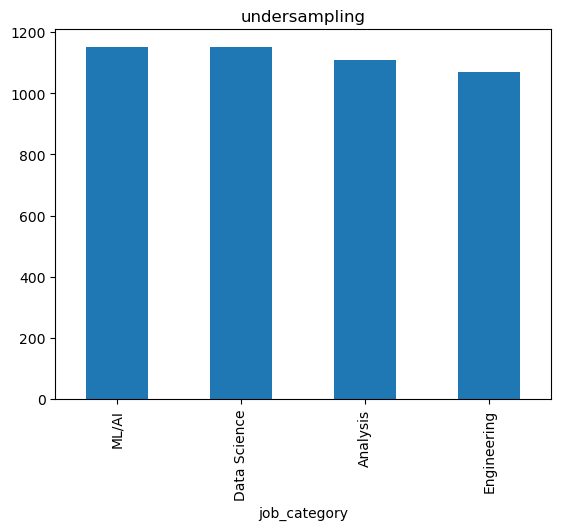

In [ ]:
# job_category oversampling

#classes count
count_class_DataScience , count_class_MLAI , count_class_Analysis , count_class_Engineering = df.job_category.value_counts()

# divide the data by class
df_class_DataScience = df[df['job_category'] == 'Data Science']
df_class_MLAI = df[df['job_category'] == 'ML/AI']
df_class_Analysis = df[df['job_category'] == 'Analysis']
df_class_Engineering = df[df['job_category'] == 'Engineering']

# Find the size of the smallest class (here, the minority classes)
min_class_size = max(len(df_class_MLAI), len(df_class_Analysis), len(df_class_Engineering))

# Perform under-sampling by randomly selecting the same number of samples from the majority class
df_class_DataScience = df_class_DataScience.sample(n=min_class_size, random_state=42)

# Combine all the classes back into a balanced dataset
df_balanced = pd.concat([df_class_DataScience, df_class_MLAI, df_class_Analysis, df_class_Engineering])

# Shuffle the data to avoid any order bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.job_category.value_counts().plot(kind = 'bar' , title = 'undersampling')